# Configuration

In [1]:
#Parameters
PROJECT_NAME = 'ML1010_Weekly'
ENABLE_COLAB = True

#Root Machine Learning Directory. Projects appear underneath
GOOGLE_DRIVE_MOUNT = '/content/gdrive' 
COLAB_ROOT_DIR = GOOGLE_DRIVE_MOUNT + '/MyDrive/Colab Notebooks'
COLAB_INIT_DIR = COLAB_ROOT_DIR + '/utility_files'

LOCAL_ROOT_DIR = '/home/magni/Documents/ML_Projects'
LOCAL_INIT_DIR = LOCAL_ROOT_DIR + '/utility_files'

# Bootstrap Environment

In [2]:
#add in support for utility file directory and importing
import sys
import os

if ENABLE_COLAB:
  #Need access to drive
  from google.colab import drive
  drive.mount(GOOGLE_DRIVE_MOUNT, force_remount=True)
  
  #add in utility directory to syspath to import 
  INIT_DIR = COLAB_INIT_DIR
  sys.path.append(os.path.abspath(INIT_DIR))
  
  #Config environment variables
  ROOT_DIR = COLAB_ROOT_DIR
  
else:
  #add in utility directory to syspath to import
  INIT_DIR = LOCAL_INIT_DIR
  sys.path.append(os.path.abspath(INIT_DIR))
  
  #Config environment variables
  ROOT_DIR = LOCAL_ROOT_DIR

#Import Utility Support
from jarvis import Jarvis
jarvis = Jarvis(ROOT_DIR, PROJECT_NAME)

import mv_python_utils as mvutils

Mounted at /content/gdrive
Wha...where am I?
I am awake now.

I have set your current working directory to /content/gdrive/MyDrive/Colab Notebooks/ML1010_Weekly
The current time is 11:57
Hello sir. Extra caffeine may help.



# Setup Runtime Environment

In [3]:
if ENABLE_COLAB:
  #!pip install scipy -q
  #!pip install scikit-learn -q
  #!pip install pycaret -q
  #!pip install matplotlib -q
  #!pip install joblib -q
  #!pip install pandasql -q

  display('Google Colab enabled')
else:
  display('Google Colab not enabled')

#Common imports
import json
import gzip
import pandas as pd
import numpy as np
import matplotlib
import re
import nltk
import matplotlib.pyplot as plt

pd.set_option('mode.chained_assignment', None)
nltk.download('stopwords')
%matplotlib inline

import warnings

warnings.filterwarnings("ignore")


'Google Colab enabled'

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


# Load Data

In [4]:
jarvis.showAllDataFiles()

Here are all your available data files
[D] /content/gdrive/MyDrive/Colab Notebooks/data [Empty directory]

[D] /content/gdrive/MyDrive/Colab Notebooks/data/Jarvis
---[   gz][  pkl]--> 02_NLP_ReviewTextData.pkl.gz (30.08 MB)
---[   gz][  pkl]--> 02_NLP_SummaryData.pkl.gz (2.88 MB)
---[   gz][  csv]--> movie_reviews_cleaned.csv.gz (14.73 MB)
---[   gz][  csv]--> wk3_task_data.csv.gz (33.47 KB)

[D] /content/gdrive/MyDrive/Colab Notebooks/data/Jarvis/01_original [Empty directory]

[D] /content/gdrive/MyDrive/Colab Notebooks/data/Jarvis/02_working [Empty directory]

[D] /content/gdrive/MyDrive/Colab Notebooks/data/Jarvis/03_train
---[   gz][  pkl]--> 02_NLP_SummaryData.pkl.gz (2.88 MB)
---[   gz][  pkl]--> 02_NLP_TitleData.pkl.gz (1.43 MB)
---[   gz][  pkl]--> 03_NLP_ReviewTextData.pkl.gz (10.91 MB)
---[   gz][  pkl]--> 03_NLP_SummaryData.pkl.gz (1.62 MB)

[D] /content/gdrive/MyDrive/Colab Notebooks/data/Jarvis/04_test
---[   gz][  csv]--> pima-indians-diabetes.csv.gz (8.53 KB)
---[   gz][

In [55]:
df = pd.read_csv(jarvis.DATA_DIR + '/complaints.csv.gz')

In [56]:
mvutils.exploreDataframe(df, numRecords=1)
#df.info(verbose=True)

dataframe shape: (2355756, 18)

dataframe info: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2355756 entries, 0 to 2355755
Data columns (total 18 columns):
 #   Column                        Dtype 
---  ------                        ----- 
 0   Date received                 object
 1   Product                       object
 2   Sub-product                   object
 3   Issue                         object
 4   Sub-issue                     object
 5   Consumer complaint narrative  object
 6   Company public response       object
 7   Company                       object
 8   State                         object
 9   ZIP code                      object
 10  Tags                          object
 11  Consumer consent provided?    object
 12  Submitted via                 object
 13  Date sent to company          object
 14  Company response to consumer  object
 15  Timely response?              object
 16  Consumer disputed?            object
 17  Complaint ID                  int64

,Date received,Product,Sub-product,Issue,Sub-issue,Consumer complaint narrative,Company public response,Company,State,ZIP code,Tags,Consumer consent provided?,Submitted via,Date sent to company,Company response to consumer,Timely response?,Consumer disputed?,Complaint ID
0,2019-06-13,"Credit reporting, credit repair services, or o...",Credit reporting,Incorrect information on your report,Information belongs to someone else,NaN,NaN,CAPITAL ONE FINANCIAL CORPORATION,PA,186XX,NaN,Consent not provided,Web,2019-06-13,Closed with explanation,Yes,NaN,3274605



Bottom 1 in dataframe


,Date received,Product,Sub-product,Issue,Sub-issue,Consumer complaint narrative,Company public response,Company,State,ZIP code,Tags,Consumer consent provided?,Submitted via,Date sent to company,Company response to consumer,Timely response?,Consumer disputed?,Complaint ID
2355755,2018-03-07,Mortgage,Other type of mortgage,Trouble during payment process,NaN,NaN,Company has responded to the consumer and the ...,WELLS FARGO & COMPANY,CA,91304,NaN,NaN,Referral,2018-03-08,Closed with explanation,Yes,NaN,2837068


In [57]:
#delete all null values for narrative
df = df[pd.notnull(df['Consumer complaint narrative'])]
df.reset_index(inplace=True, drop=True)
mvutils.exploreDataframe(df)

dataframe shape: (821617, 18)

dataframe info: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 821617 entries, 0 to 821616
Data columns (total 18 columns):
 #   Column                        Non-Null Count   Dtype 
---  ------                        --------------   ----- 
 0   Date received                 821617 non-null  object
 1   Product                       821617 non-null  object
 2   Sub-product                   769445 non-null  object
 3   Issue                         821617 non-null  object
 4   Sub-issue                     651600 non-null  object
 5   Consumer complaint narrative  821617 non-null  object
 6   Company public response       398420 non-null  object
 7   Company                       821617 non-null  object
 8   State                         817979 non-null  object
 9   ZIP code                      643495 non-null  object
 10  Tags                          131213 non-null  object
 11  Consumer consent provided?    821617 non-null  object
 12  Submitted 

,Date received,Product,Sub-product,Issue,Sub-issue,Consumer complaint narrative,Company public response,Company,State,ZIP code,Tags,Consumer consent provided?,Submitted via,Date sent to company,Company response to consumer,Timely response?,Consumer disputed?,Complaint ID
0,2019-11-01,Vehicle loan or lease,Loan,Struggling to pay your loan,Denied request to lower payments,I contacted Ally on Friday XX/XX/XXXX after fa...,Company has responded to the consumer and the ...,ALLY FINANCIAL INC.,NJ,088XX,NaN,Consent provided,Web,2019-11-01,Closed with explanation,Yes,NaN,3425257



Bottom 1 in dataframe


,Date received,Product,Sub-product,Issue,Sub-issue,Consumer complaint narrative,Company public response,Company,State,ZIP code,Tags,Consumer consent provided?,Submitted via,Date sent to company,Company response to consumer,Timely response?,Consumer disputed?,Complaint ID
821616,2017-01-16,Credit reporting,NaN,Incorrect information on credit report,Account status,My husband and I are in the middle of an FHA S...,Company has responded to the consumer and the ...,"TRANSUNION INTERMEDIATE HOLDINGS, INC.",GA,302XX,NaN,Consent provided,Web,2017-01-16,Closed with explanation,Yes,No,2292586


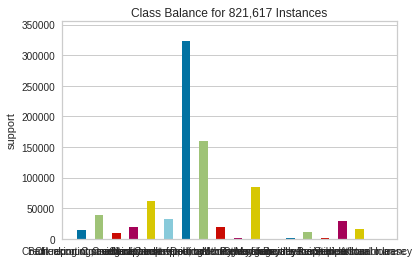

In [58]:
mvutils.displayClassBalance(df, 'Product')

In [59]:
df = df.groupby('Product', group_keys=False).apply(lambda x: x.sample(frac=0.01))

In [60]:
import importlib
importlib.reload(mvutils)

<module 'mv_python_utils' from '/content/gdrive/MyDrive/Colab Notebooks/utility_files/mv_python_utils.py'>

In [61]:
col = ['Product', 'Consumer complaint narrative']
df = df[col]
df.columns

Index(['Product', 'Consumer complaint narrative'], dtype='object')

In [62]:
df.columns = ['Product', 'Consumer_complaint_narrative']

In [63]:
df['category_id'] = df['Product'].factorize()[0]
from io import StringIO
category_id_df = df[['Product', 'category_id']].drop_duplicates().sort_values('category_id')
category_to_id = dict(category_id_df.values)
id_to_category = dict(category_id_df[['category_id', 'Product']].values)

In [64]:
df.head()


,Product,Consumer_complaint_narrative,category_id
593793,Bank account or service,Purchased a Jumbo C.D. from CIT Bank XXXX/XXXX...,0
256852,Bank account or service,I had applied for a CitiGold Checking account ...,0
658921,Bank account or service,"RE Case number XXXX On XX/XX/2016, I hired XXX...",0
569764,Bank account or service,This is my second complaint against Chase Bank...,0
651096,Bank account or service,"I went to a bank ATM of XXXX in XXXX, XXXX, lo...",0


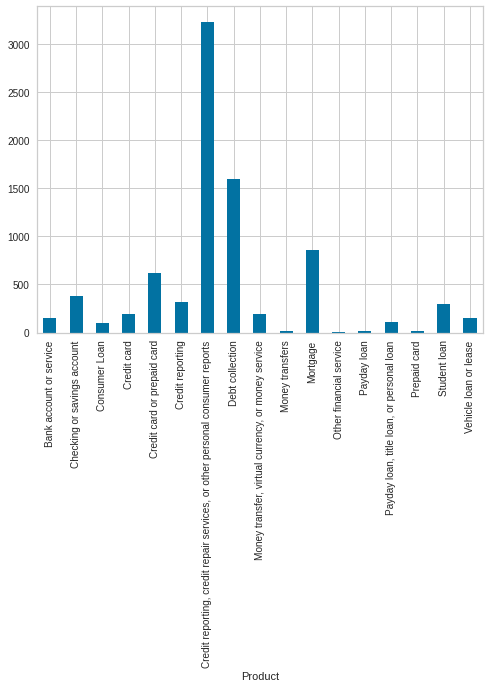

In [65]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(8,6))
df.groupby('Product').Consumer_complaint_narrative.count().plot.bar(ylim=0)
plt.show()

In [66]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(sublinear_tf=True, min_df=5, norm='l2', encoding='latin-1', ngram_range=(1, 2), stop_words='english')

features = tfidf.fit_transform(df.Consumer_complaint_narrative).toarray()
labels = df.category_id
features.shape

(8215, 22919)

In [67]:
from sklearn.feature_selection import chi2
import numpy as np

N = 2
for Product, category_id in sorted(category_to_id.items()):
  features_chi2 = chi2(features, labels == category_id)
  indices = np.argsort(features_chi2[0])
  feature_names = np.array(tfidf.get_feature_names())[indices]
  unigrams = [v for v in feature_names if len(v.split(' ')) == 1]
  bigrams = [v for v in feature_names if len(v.split(' ')) == 2]
  print("# '{}':".format(Product))
  print("  . Most correlated unigrams:\n       . {}".format('\n       . '.join(unigrams[-N:])))
  print("  . Most correlated bigrams:\n       . {}".format('\n       . '.join(bigrams[-N:])))

# 'Bank account or service':
  . Most correlated unigrams:
       . citigold
       . overdraft
  . Most correlated bigrams:
       . citigold checking
       . overdraft fees
# 'Checking or savings account':
  . Most correlated unigrams:
       . deposit
       . bank
  . Most correlated bigrams:
       . debit card
       . checking account
# 'Consumer Loan':
  . Most correlated unigrams:
       . car
       . santander
  . Most correlated bigrams:
       . motor finance
       . months loan
# 'Credit card':
  . Most correlated unigrams:
       . amex
       . card
  . Most correlated bigrams:
       . macy credit
       . credit card
# 'Credit card or prepaid card':
  . Most correlated unigrams:
       . merchant
       . card
  . Most correlated bigrams:
       . american express
       . credit card
# 'Credit reporting':
  . Most correlated unigrams:
       . experian
       . equifax
  . Most correlated bigrams:
       . disputed equifax
       . equifax ignored
# 'Credit reporti

In [68]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB

X_train, X_test, y_train, y_test = train_test_split(df['Consumer_complaint_narrative'], df['Product'], random_state = 0)
count_vect = CountVectorizer()
X_train_counts = count_vect.fit_transform(X_train)
tfidf_transformer = TfidfTransformer()
X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)

clf = MultinomialNB().fit(X_train_tfidf, y_train)

In [69]:
print(clf.predict(count_vect.transform(["This company refuses to provide me verification and validation of debt per my right under the FDCPA. I do not believe this debt is mine."])))

['Credit reporting, credit repair services, or other personal consumer reports']


In [70]:
#I trimmed data and used a subset so it doesn't find narrative in the dataframe
df[df['Consumer_complaint_narrative'] == "This company refuses to provide me verification and validation of debt per my right under the FDCPA. I do not believe this debt is mine."]

,Product,Consumer_complaint_narrative,category_id


In [71]:
df.head()

,Product,Consumer_complaint_narrative,category_id
593793,Bank account or service,Purchased a Jumbo C.D. from CIT Bank XXXX/XXXX...,0
256852,Bank account or service,I had applied for a CitiGold Checking account ...,0
658921,Bank account or service,"RE Case number XXXX On XX/XX/2016, I hired XXX...",0
569764,Bank account or service,This is my second complaint against Chase Bank...,0
651096,Bank account or service,"I went to a bank ATM of XXXX in XXXX, XXXX, lo...",0


In [72]:
print(clf.predict(count_vect.transform(["I am disputing the inaccurate information the Chex-Systems has on my credit report. I initially submitted a police report on XXXX/XXXX/16 and Chex Systems only deleted the items that I mentioned in the letter and not all the items that were actually listed on the police report. In other words they wanted me to say word for word to them what items were fraudulent. The total disregard of the police report and what accounts that it states that are fraudulent. If they just had paid a little closer attention to the police report I would not been in this position now and they would n't have to research once again. I would like the reported information to be removed : XXXX XXXX XXXX"])))

['Credit reporting, credit repair services, or other personal consumer reports']


In [73]:
#I trimmed data and used a subset so it doesn't find narrative in the dataframe
df[df['Consumer_complaint_narrative'] == "I am disputing the inaccurate information the Chex-Systems has on my credit report. I initially submitted a police report on XXXX/XXXX/16 and Chex Systems only deleted the items that I mentioned in the letter and not all the items that were actually listed on the police report. In other words they wanted me to say word for word to them what items were fraudulent. The total disregard of the police report and what accounts that it states that are fraudulent. If they just had paid a little closer attention to the police report I would not been in this position now and they would n't have to research once again. I would like the reported information to be removed : XXXX XXXX XXXX"]

,Product,Consumer_complaint_narrative,category_id


In [74]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC

from sklearn.model_selection import cross_val_score


models = [
    RandomForestClassifier(n_estimators=200, max_depth=3, random_state=0),
    LinearSVC(),
    MultinomialNB(),
    LogisticRegression(random_state=0),
]
CV = 5
cv_df = pd.DataFrame(index=range(CV * len(models)))
entries = []
for model in models:
  model_name = model.__class__.__name__
  accuracies = cross_val_score(model, features, labels, scoring='accuracy', cv=CV)
  for fold_idx, accuracy in enumerate(accuracies):
    entries.append((model_name, fold_idx, accuracy))
cv_df = pd.DataFrame(entries, columns=['model_name', 'fold_idx', 'accuracy'])

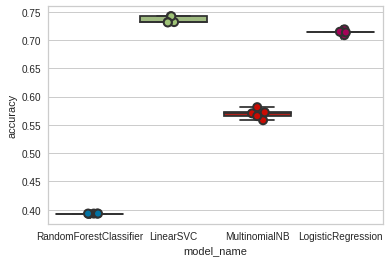

In [75]:
import seaborn as sns
sns.boxplot(x='model_name', y='accuracy', data=cv_df)
sns.stripplot(x='model_name', y='accuracy', data=cv_df, 
              size=8, jitter=True, edgecolor="gray", linewidth=2)
plt.show()

In [76]:
cv_df.groupby('model_name').accuracy.mean()

model_name
LinearSVC                 0.735606
LogisticRegression        0.713938
MultinomialNB             0.569446
RandomForestClassifier    0.393061
Name: accuracy, dtype: float64

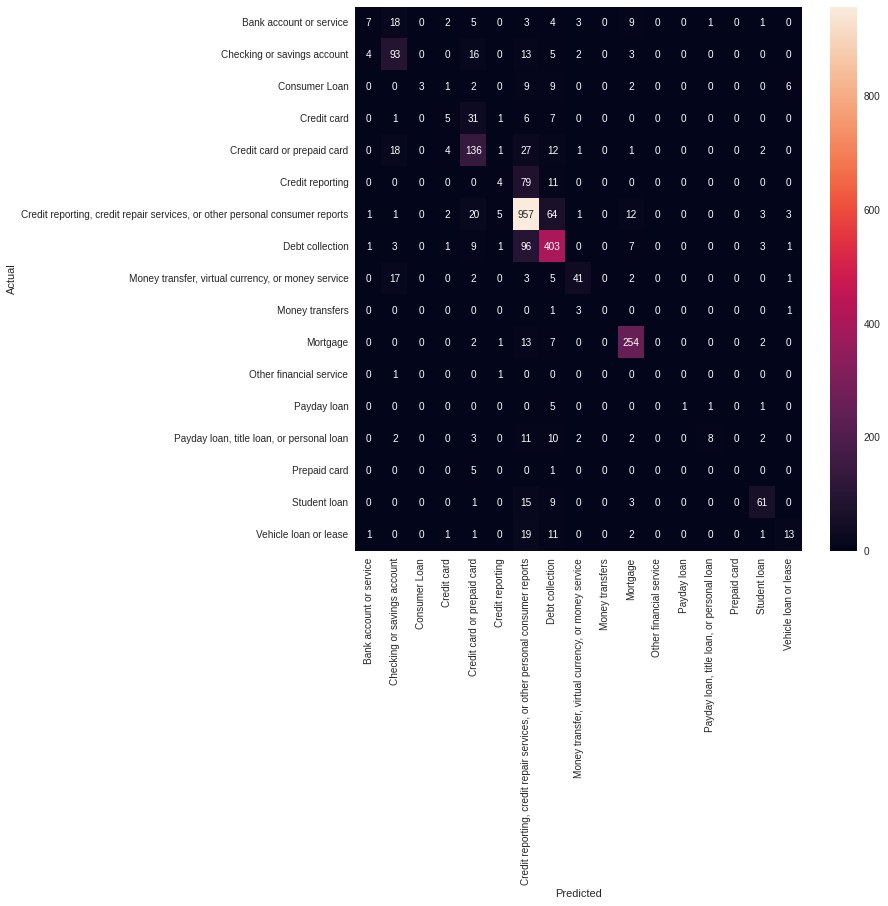

In [77]:
model = LinearSVC()
X_train, X_test, y_train, y_test, indices_train, indices_test = train_test_split(features, labels, df.index, test_size=0.33, random_state=0)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
from sklearn.metrics import confusion_matrix
conf_mat = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(conf_mat, annot=True, fmt='d',
            xticklabels=category_id_df.Product.values, yticklabels=category_id_df.Product.values)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

In [78]:
category_id_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17 entries, 593793 to 286016
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Product      17 non-null     object
 1   category_id  17 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 408.0+ bytes


In [79]:
from IPython.display import display

for predicted in category_id_df.category_id:
  for actual in category_id_df.category_id:
    if predicted != actual and conf_mat[actual, predicted] >= 6:
      print("'{}' predicted as '{}' : {} examples.".format(id_to_category[actual], id_to_category[predicted], conf_mat[actual, predicted]))
      display(df.loc[indices_test[(y_test == actual) & (y_pred == predicted)]][['Product', 'Consumer_complaint_narrative']])
      print('')

'Bank account or service' predicted as 'Checking or savings account' : 18 examples.


,Product,Consumer_complaint_narrative
525836,Bank account or service,"checking account was over-drafted. I had, acco..."
646988,Bank account or service,"Dear Sir, On Friday, XX/XX/XXXX my wallet ( CC..."
563293,Bank account or service,My boyfriend and I have an account with US Ban...
659868,Bank account or service,"XXXX separate Wells Fargo Banks in XXXX, Texas..."
652467,Bank account or service,My checking account with PNC Bank had a low ba...
659567,Bank account or service,I got a job offer on XXXX for a administrative...
594970,Bank account or service,Citibank advertised the promotional bonus in X...
584175,Bank account or service,I 'm writing in regards to our experience with...
687637,Bank account or service,I had slightly more than {$1700.00} in my Bank...
624464,Bank account or service,I have been a customer with Bank of America fo...



'Credit card or prepaid card' predicted as 'Checking or savings account' : 18 examples.


,Product,Consumer_complaint_narrative
365757,Credit card or prepaid card,I'm having trouble with dates because now I'm ...
6238,Credit card or prepaid card,"on XX/XX/2021, i asked chime bank to cancel tw..."
541127,Credit card or prepaid card,Enroll in saving program of Netspend full-out ...
86049,Credit card or prepaid card,Froze account because of identity these now I ...
171382,Credit card or prepaid card,My name is XXXX XXXX. I opened a XXXX XXXXr cr...
497775,Credit card or prepaid card,XX/XX/XXXX- Paid our account in full in Good F...
741850,Credit card or prepaid card,This is regarding making payments to XXXX Visa...
535625,Credit card or prepaid card,So a while back my credit card came up missing...
800862,Credit card or prepaid card,i am missing over XXXX dollars from my relia c...
97690,Credit card or prepaid card,1 ) I noticed fraudulent transactions on my cr...



'Money transfer, virtual currency, or money service' predicted as 'Checking or savings account' : 17 examples.


,Product,Consumer_complaint_narrative
531203,"Money transfer, virtual currency, or money ser...",I had a wire transfer done to a bank in XXXX ....
762375,"Money transfer, virtual currency, or money ser...",On XX/XX/2018 my savings and checking accounts...
240393,"Money transfer, virtual currency, or money ser...",On XX/XX/2020 Wells Fargo initiated a wire tra...
136103,"Money transfer, virtual currency, or money ser...",On XX/XX/2021 I initiated a transfer through X...
402040,"Money transfer, virtual currency, or money ser...",On XX/XX/2018. I was victim of a fraudulent tr...
378405,"Money transfer, virtual currency, or money ser...","Dealing with the Post-divorce litigation, thro..."
30486,"Money transfer, virtual currency, or money ser...",Case Number - XXXX. \nPlease refer to the case...
417851,"Money transfer, virtual currency, or money ser...",I attempted to send send money with this compa...
283836,"Money transfer, virtual currency, or money ser...",I filed a previous complaint against this comp...
215920,"Money transfer, virtual currency, or money ser...","On Sunday XX/XX/ 2019, I was a victim of a sca..."



'Checking or savings account' predicted as 'Credit card or prepaid card' : 16 examples.


,Product,Consumer_complaint_narrative
814967,Checking or savings account,"Hello, I feel I must explain this for a true u..."
495757,Checking or savings account,I am a Discover Bank customer and must escalat...
331302,Checking or savings account,"In XX/XX/2020, I received an invitation from C..."
92500,Checking or savings account,"On XX/XX/2020, a person name XXXX XXXX from XX..."
116147,Checking or savings account,On XX/XX/2020 it was brought to my attention t...
80777,Checking or savings account,"Hi earlier this month, I paid a 5 dollar fee t..."
723665,Checking or savings account,I was banking with Wellsfargo my account was c...
504580,Checking or savings account,On XXXX/XXXX/XXXX I reserved a car through XXX...
442567,Checking or savings account,My name is XXXX XXXX and actually this is abou...
220426,Checking or savings account,I get my child support from XXXX on a Direct E...



'Credit card' predicted as 'Credit card or prepaid card' : 31 examples.


,Product,Consumer_complaint_narrative
820125,Credit card,In XX/XX/XXXX and XX/XX/XXXX my credit card pa...
592916,Credit card,Amex Every day Credit card sent replacement ca...
571092,Credit card,i tried to call this number and i can not call...
660261,Credit card,I receive a promotional mailer ( not a stateme...
624781,Credit card,My ex-wife made balance transfers to her indiv...
606990,Credit card,"XXXX, XXXX of 2016, I was late for the Target ..."
692529,Credit card,"To Whom It May Concern, I am writing this lett..."
567335,Credit card,I would like to amend my previous complaint [ ...
666641,Credit card,"Aloha, Having received two confirmations of th..."
699587,Credit card,I have contacted Bloomingdale 's customer serv...



'Credit reporting, credit repair services, or other personal consumer reports' predicted as 'Credit card or prepaid card' : 20 examples.


,Product,Consumer_complaint_narrative
258696,"Credit reporting, credit repair services, or o...",I had a credit card account with XXXX until X...
88814,"Credit reporting, credit repair services, or o...",I see multiple 30-60 days late marks which is ...
806811,"Credit reporting, credit repair services, or o...",Chase Bank stopped sending mail without author...
516223,"Credit reporting, credit repair services, or o...",There has never been a XXXX XXXX card or accou...
363969,"Credit reporting, credit repair services, or o...",I talked to a CSR around XX/XX/XXXX about spre...
252331,"Credit reporting, credit repair services, or o...",All of my XXXX XXXX accounts went into LATE p...
551532,"Credit reporting, credit repair services, or o...",Reference closed complaint XXXX. My issue is t...
35987,"Credit reporting, credit repair services, or o...",I submitted an application online with Discove...
123732,"Credit reporting, credit repair services, or o...",I have been a XXXX XXXX XXXX ( Account # XXXX*...
704856,"Credit reporting, credit repair services, or o...",I had a problem with a late fee issue which wa...



'Debt collection' predicted as 'Credit card or prepaid card' : 9 examples.


,Product,Consumer_complaint_narrative
224682,Debt collection,I found out in XX/XX/XXXX while applying to re...
33264,Debt collection,I payed this company comenity bank XXXX XXXXXX...
636581,Debt collection,On XXXX/XXXX/2016 I ordered a Sears Craftsman ...
204093,Debt collection,A Synchrony/Lowes debt that was somehow in my ...
374524,Debt collection,I was extended a credit account by Citibank to...
173132,Debt collection,This kind of account is placed as a charged of...
118766,Debt collection,I recently called to cancel my XXXX XXXX card ...
228472,Debt collection,Complainant submitted payment to Merchant ( Ba...
344762,Debt collection,Florida law does not allow credit card compani...



'Checking or savings account' predicted as 'Credit reporting, credit repair services, or other personal consumer reports' : 13 examples.


,Product,Consumer_complaint_narrative
440985,Checking or savings account,Accts show that belong to me I have taken care...
452023,Checking or savings account,Been trying for weeks to restore the link betw...
475177,Checking or savings account,I noticed that WF is charging me a {$12.00} a ...
357150,Checking or savings account,My credit union ( America First ) has started ...
7119,Checking or savings account,Brclysbankde-bank And my credit was ran by thi...
8263,Checking or savings account,I'm trying to use the XXXX XXXX and a XXXX XXX...
125221,Checking or savings account,I was alerted via XXXX XXXX ID Theft protectio...
783885,Checking or savings account,"On XX/XX/2018, an amount of {$500.00} was paid..."
325805,Checking or savings account,I've been having problems maintaining my accou...
749836,Checking or savings account,They won't release our funds and since the XXX...



'Consumer Loan' predicted as 'Credit reporting, credit repair services, or other personal consumer reports' : 9 examples.


,Product,Consumer_complaint_narrative
640118,Consumer Loan,"On XXXX XXXX, 2016 I went to KIA of XXXX, Al. ..."
597538,Consumer Loan,"I traded in a truck, and the dealership delaye..."
797630,Consumer Loan,We have leased a XXXX XXXX in XXXX XXXX and it...
706850,Consumer Loan,I did a little research on repossession of veh...
679826,Consumer Loan,Let me make this very clear to Santander Consu...
566035,Consumer Loan,I am hoping you can help me resolve what I fee...
599396,Consumer Loan,Automatic payments for my car loan were discon...
584781,Consumer Loan,I MADE A COMPLAINT TO CADOI BELOW. I HAVE ALRE...
481494,Consumer Loan,I paid off a XX/XX/XXXX from AutoTrakk XXXX. T...



'Credit card' predicted as 'Credit reporting, credit repair services, or other personal consumer reports' : 6 examples.


,Product,Consumer_complaint_narrative
515655,Credit card,I got a tax form mailed to my address with out...
583960,Credit card,I have never had a late payment on my credit e...
602886,Credit card,Information that is XXXX years old is still on...
599651,Credit card,Discover has misreported a balance on a credit...
648005,Credit card,**NEW INFORMATION** DUNNING LETTER DATED XX/XX...
570358,Credit card,Disputed a charge XXXX/XXXX/2016. They have no...



'Credit card or prepaid card' predicted as 'Credit reporting, credit repair services, or other personal consumer reports' : 27 examples.


,Product,Consumer_complaint_narrative
104734,Credit card or prepaid card,I am charged monthly on my XXXX XXXX XXXX for ...
58571,Credit card or prepaid card,I have three credit cards that are open with m...
711883,Credit card or prepaid card,I had a credit card with Kohls that went into ...
774289,Credit card or prepaid card,"Yeah, I just got a XXXX 's Prepaid XXXX in the..."
782113,Credit card or prepaid card,Equifax has been non-compliant with removing t...
423144,Credit card or prepaid card,In reference to : Capital One Case : XXXX CFPB...
718751,Credit card or prepaid card,XXXX XXXX XXXX c/o PayPal Credit performed a c...
165482,Credit card or prepaid card,"I AM VICTIM OF AN IDENTITY THEFT, AND THE STAT..."
518639,Credit card or prepaid card,"On Monday, XXXX XXXX, XXXX, I applied for USAA..."
429310,Credit card or prepaid card,i made a XXXX payment and they cashed check bu...



'Credit reporting' predicted as 'Credit reporting, credit repair services, or other personal consumer reports' : 79 examples.


,Product,Consumer_complaint_narrative
667800,Credit reporting,Experian is reporting a fraudulent account on ...
555941,Credit reporting,I am looking at my Equifax credit report. On a...
678717,Credit reporting,I am making formal complaint against XXXX and ...
652240,Credit reporting,I disputed a collection account from XXXX on m...
652289,Credit reporting,I have a vehicle that was written off on my cr...
...,...,...
641537,Credit reporting,Account was verified through equifax but the d...
591479,Credit reporting,Collection Accounts identified as ( XXXX ) on ...
688092,Credit reporting,I requested a report from all three agencies o...
523378,Credit reporting,Equifax has taken more than 40 days to conduct...



'Debt collection' predicted as 'Credit reporting, credit repair services, or other personal consumer reports' : 96 examples.


,Product,Consumer_complaint_narrative
531608,Debt collection,XXXX/XXXX/2017 This car was volunteer repo Bec...
645579,Debt collection,I never opened a account or done business with...
535446,Debt collection,"On XX/XX/2017, I received a message on XXXX XX..."
683130,Debt collection,I checked my credit report via credit karma an...
526062,Debt collection,Contacted about debt that is not on my credit ...
...,...,...
423847,Debt collection,My identity got stolen around 6 years ago from...
707190,Debt collection,I have noticed this Factoring Company named XX...
12068,Debt collection,I would like to request for experience to send...
17495,Debt collection,XXXX XXXX XXXX XXXX XXXX XXXX XXXX XXXX is a r...



'Mortgage' predicted as 'Credit reporting, credit repair services, or other personal consumer reports' : 13 examples.


,Product,Consumer_complaint_narrative
279308,Mortgage,On XX/XX/XXXX statement was printed saying XX/...
588795,Mortgage,I contacted Penny Mac Loan services on XX/XX/2...
270333,Mortgage,I filled CFPB Complaint Number XXXX and I beli...
600083,Mortgage,Huntington National Bank processed a credit bu...
392156,Mortgage,Shellpoint Mortgage Servicing is improperly ap...
98745,Mortgage,I have pulled my credit report from all three ...
687912,Mortgage,The loan was in forbearance but they are repor...
684103,Mortgage,1. In XXXX I scheduled an online bill payment ...
306700,Mortgage,"I recently applied for a car loan, when applyi..."
809107,Mortgage,XX/XX/2019. lakeview cashed a XXXX payment but...



'Payday loan, title loan, or personal loan' predicted as 'Credit reporting, credit repair services, or other personal consumer reports' : 11 examples.


,Product,Consumer_complaint_narrative
472887,"Payday loan, title loan, or personal loan",Tower Loan i s reporting on my credit report a...
227788,"Payday loan, title loan, or personal loan","Due to COVID-19, I contacted the company to pa..."
322268,"Payday loan, title loan, or personal loan",I have a loan with one main financial XXXX XXX...
160053,"Payday loan, title loan, or personal loan",I was told by XXXX at Mariner Finance on XXXX ...
223373,"Payday loan, title loan, or personal loan",NetCredit refuse to honor their agreement. I b...
352174,"Payday loan, title loan, or personal loan",These people are charging me a usury interest ...
235852,"Payday loan, title loan, or personal loan",My upgrade card has a personal line of credit....
515006,"Payday loan, title loan, or personal loan","Dear Sir or Madam, I am contacting you to info..."
235581,"Payday loan, title loan, or personal loan","My husband, who I am separated from, took out ..."
214415,"Payday loan, title loan, or personal loan",My Credit report states that a payday loan deb...



'Student loan' predicted as 'Credit reporting, credit repair services, or other personal consumer reports' : 15 examples.


,Product,Consumer_complaint_narrative
383434,Student loan,I currently Have 6 accounts with fed loans in ...
360961,Student loan,"To whom it may concern, Im hoping to get this ..."
426501,Student loan,I was a student at XXXX XXXX XXXX. In XX/XX/20...
673105,Student loan,"Navient is the servicer of my partner, XXXX. X..."
93827,Student loan,Nelnet has conflicting information reported to...
747208,Student loan,I have a loan with XXXX. I have always made my...
756136,Student loan,I contact XXXX XXXX on XX/XX/XXXX regarding my...
755777,Student loan,I have been disputing the accounts with AES --...
701706,Student loan,i was told my only option was to go into forbe...
292391,Student loan,"In XX/XX/XXXX, my wife and I obtained a loan f..."



'Vehicle loan or lease' predicted as 'Credit reporting, credit repair services, or other personal consumer reports' : 19 examples.


,Product,Consumer_complaint_narrative
489880,Vehicle loan or lease,I had filed a complaint with cfpb on a account...
396513,Vehicle loan or lease,I HAD A CAR LOAN WITH CAR FINANCE XXXX. THE TO...
51358,Vehicle loan or lease,I don't recall ever open up this account at all
179142,Vehicle loan or lease,"I traded my XXXX, loan # XXXX, in XX/XX/2014 f..."
457588,Vehicle loan or lease,After multiple discussions with BMW Bank of No...
286016,Vehicle loan or lease,On XX/XX/XXXX I paid my auto loan in full {$10...
348167,Vehicle loan or lease,I sold my vehicle to a XXXX dealership in XXXX...
410395,Vehicle loan or lease,I agreed to have my credit checked by the XXXX...
789249,Vehicle loan or lease,I spoke with and Representative on XX/XX/XXXX ...
195122,Vehicle loan or lease,Car was total loss in accident on XX/XX/XXXX. ...



'Consumer Loan' predicted as 'Debt collection' : 9 examples.


,Product,Consumer_complaint_narrative
567058,Consumer Loan,I have a loan with One Main Financial. I have ...
627912,Consumer Loan,I wrecked my XXXX XXXX in XXXX of XXXX and my ...
634636,Consumer Loan,It has come to my attention that there is a cl...
629286,Consumer Loan,BMW FINANCIAL IS REPORTING A CHARGE OF ON MY C...
584106,Consumer Loan,Purchased a television and dvd player back XX/...
613416,Consumer Loan,TOWER LOAN IS CALLING ME BACK TO BACK SEVERAL ...
609832,Consumer Loan,I had a loan with care credit and we had a pay...
640863,Consumer Loan,Quick Bridge funding procured my personal info...
289169,Consumer Loan,American Honda Finance Corporation deducted tw...



'Credit card' predicted as 'Debt collection' : 7 examples.


,Product,Consumer_complaint_narrative
597227,Credit card,My name is XXXX and I have already file a comp...
591022,Credit card,unfortunately due to family circumstances ( tr...
821054,Credit card,"My complaint involves Capital One. Originally,..."
643044,Credit card,My wife has a credit card account with Citiban...
652682,Credit card,There is an account that myself and my boyfrie...
644593,Credit card,PayPal credit will not tell me WHY I am not el...
568575,Credit card,Citibank advertised a promotion for its XXXX c...



'Credit card or prepaid card' predicted as 'Debt collection' : 12 examples.


,Product,Consumer_complaint_narrative
137805,Credit card or prepaid card,I attempted to contact synchrony bank regardin...
756912,Credit card or prepaid card,American Express has been trying to collect a ...
174609,Credit card or prepaid card,American Express closed my card and began call...
147094,Credit card or prepaid card,"I, XXXX XXXX received a call from XXXX XXXX XX..."
757368,Credit card or prepaid card,My wife opened a credit card in her name and h...
243488,Credit card or prepaid card,The company is Fortiva Credit card company. My...
92712,Credit card or prepaid card,BB & T has once again done the unthinkable. I ...
553771,Credit card or prepaid card,Airline ticket was purchased for two adults in...
493134,Credit card or prepaid card,I paid for a service and was never even done I...
120421,Credit card or prepaid card,On XX/XX/XXXX I called Citibank/Visa- Costco t...



'Credit reporting' predicted as 'Debt collection' : 11 examples.


,Product,Consumer_complaint_narrative
661583,Credit reporting,We filed a complaint with XXXX XXXX about the ...
571265,Credit reporting,There is a judgment on my credit report with d...
665836,Credit reporting,Collection Bureau Inc. placed an account on my...
604719,Credit reporting,Back in XX/XX/2011 I had to close an account b...
604363,Credit reporting,Transunion has re-inserted a collection from X...
687489,Credit reporting,Service was being interrupted for 3 months and...
818387,Credit reporting,The credit reporting company Midland Credit is...
597214,Credit reporting,XXXX previously reported that I had a medical ...
562267,Credit reporting,I contacted Portfolio Recovery in earlier XXXX...
626529,Credit reporting,I want to dispute a {$95.00} medical bill that...



'Credit reporting, credit repair services, or other personal consumer reports' predicted as 'Debt collection' : 64 examples.


,Product,Consumer_complaint_narrative
91663,"Credit reporting, credit repair services, or o...",XXXX XXXX ( Account number XXXX ) is a XXXX XX...
541301,"Credit reporting, credit repair services, or o...","Hello, My name is XXXX XXXX . I have a XXX..."
24535,"Credit reporting, credit repair services, or o...",In XXXX of XXXX I was notified by XXXX and XXX...
467119,"Credit reporting, credit repair services, or o...",Experian is showing paragon as something I owe...
277469,"Credit reporting, credit repair services, or o...",Prior to XX/XX/XXXX I was with XX/XX/XXXX for ...
...,...,...
343463,"Credit reporting, credit repair services, or o...",XXXX XXXX XXXX IS REPORTING ON MY CREDIT REPOR...
244456,"Credit reporting, credit repair services, or o...",There is a XXXX XXXX credit collection on my r...
76843,"Credit reporting, credit repair services, or o...",OnXX/XX/2019 I pulled my XXXX credit report. ...
378501,"Credit reporting, credit repair services, or o...",I am a victim of identity theft. XXXX XXXX XXX...



'Mortgage' predicted as 'Debt collection' : 7 examples.


,Product,Consumer_complaint_narrative
385405,Mortgage,I was instructed to bring down money orders by...
410687,Mortgage,Filed for Bankruotcy Forclosed on property and...
592821,Mortgage,I am very disappointed that the CFPB did not h...
193355,Mortgage,We are working a short sale on this property. ...
41235,Mortgage,"Deceased business owner XXXX XXXX XXXX, XXXX X..."
633915,Mortgage,"XXXX XXXX, XXXX - XXXX Wells Fargo Home Mortga..."
798503,Mortgage,I have been attempting to navigate the short s...



'Payday loan, title loan, or personal loan' predicted as 'Debt collection' : 10 examples.


,Product,Consumer_complaint_narrative
376629,"Payday loan, title loan, or personal loan",In XXXX I applied for a Payday loan with XXXX ...
271898,"Payday loan, title loan, or personal loan",I am in a lease instalment loan with acima cre...
719303,"Payday loan, title loan, or personal loan",AD Astra Recovery services purchased this debt...
305051,"Payday loan, title loan, or personal loan","on XXXX XXXX, I requested to Negotiate this de..."
350844,"Payday loan, title loan, or personal loan",In XX/XX/XXXXI went to XXXX XXXX XXXX ( owned ...
481502,"Payday loan, title loan, or personal loan",The original loan was for {$500.00}. It has si...
64486,"Payday loan, title loan, or personal loan",Mariner Finance agreed to a reduced settlement...
298573,"Payday loan, title loan, or personal loan",Direct Recovery XXXX is calling all my family ...
814230,"Payday loan, title loan, or personal loan",I took only {$1200.00} short term loan and sta...
715922,"Payday loan, title loan, or personal loan",XXXX sold my information to a debt solutions c...



'Student loan' predicted as 'Debt collection' : 9 examples.


,Product,Consumer_complaint_narrative
497891,Student loan,Reliant Capital Solutions began to garnishment...
151579,Student loan,MRS collections called me and asked for my fat...
250671,Student loan,The company is Navient. My issue is not that t...
528103,Student loan,I just would like a debt validation of the loa...
301272,Student loan,"XXXX XXXX XXXX, I received a letter "" Notice o..."
456170,Student loan,Lawsuit filed against me onXX/XX/2016. \nCAN N...
80153,Student loan,My loan is supposed to be deferred until six m...
556973,Student loan,After telling AES that my address is no longer...
703636,Student loan,I entered into a income based repayment agreem...



'Vehicle loan or lease' predicted as 'Debt collection' : 11 examples.


,Product,Consumer_complaint_narrative
339623,Vehicle loan or lease,"Under the laws of the FDCPA, I have contacted ..."
351902,Vehicle loan or lease,I leased a new XXXX Chevy Equinox at XXXX XXXX...
307446,Vehicle loan or lease,"states that i still owe XXXX, however this loa..."
166107,Vehicle loan or lease,This is a complaint against Lia Motors Finance...
792570,Vehicle loan or lease,I was in a total loss accident in XX/XX/2018. ...
56754,Vehicle loan or lease,sometime around XXXX i fell behind on my car l...
406296,Vehicle loan or lease,I tried to settle with XXXX XXXX and the compa...
716988,Vehicle loan or lease,"Purchased a boat trailer ( XXXX # XXXX ), titl..."
546302,Vehicle loan or lease,Kia Motors Finance XXXX . XXXX XXXX XX...
807607,Vehicle loan or lease,My vehicle was repossessed on XX/XX/19 by XXXX...



'Bank account or service' predicted as 'Mortgage' : 9 examples.


,Product,Consumer_complaint_narrative
586950,Bank account or service,"XXXX, my bank manager at Wells Fargo, XXXX XXX..."
561217,Bank account or service,"Wells Fargo, XXXX, XXXX and XXXX have a discon..."
283381,Bank account or service,Astoria Bank steals from a XXXX Identity fraud...
624985,Bank account or service,I have a checking account and a loan ( previou...
675861,Bank account or service,my wife has n't lived with me since XX/XX/2016...
601300,Bank account or service,I am a first time home buyer attempting to pur...
638549,Bank account or service,Our daughter worked for U. S. Bank Home Mortga...
586626,Bank account or service,"In XX/XX/XXXX, I mortgaged a building loan thr..."
653231,Bank account or service,SunTrust Bank received a payoff on a consumer ...



'Credit reporting, credit repair services, or other personal consumer reports' predicted as 'Mortgage' : 12 examples.


,Product,Consumer_complaint_narrative
549032,"Credit reporting, credit repair services, or o...","On XXXX/XXXX/XXXX, I applied for a home loan t..."
478366,"Credit reporting, credit repair services, or o...",Myself and my husband refinanced our current m...
232495,"Credit reporting, credit repair services, or o...",Wells Fargo opened a fraudulent personal loan ...
359319,"Credit reporting, credit repair services, or o...",My name is XXXX XXXX my loan number is XXXX an...
316027,"Credit reporting, credit repair services, or o...","To whom it may concern, i was working on refin..."
277972,"Credit reporting, credit repair services, or o...","In XXXX of 2020, I requested my mortgage compa..."
336619,"Credit reporting, credit repair services, or o...",I am currently in the process of obtaining a l...
807171,"Credit reporting, credit repair services, or o...",I have submitted a complaint asking to correct...
521883,"Credit reporting, credit repair services, or o...",The loan account with BSI Financial Services d...
310663,"Credit reporting, credit repair services, or o...",I am having a BIG problem with Carrington Mort...



'Debt collection' predicted as 'Mortgage' : 7 examples.


,Product,Consumer_complaint_narrative
4922,Debt collection,Well I've been checking my credit score often....
753388,Debt collection,I would like to file a formal complaint with C...
438062,Debt collection,Im becoming increasingly concerned with the se...
219242,Debt collection,"1. My mortgage is current, as of XX/XX/2019, b..."
593002,Debt collection,This is a Claim of UDAAP violations pursuant t...
770759,Debt collection,"Dear CFPB, ENCLOSED you will find a QUALIFIED ..."
423629,Debt collection,This was my mother 's debt who passed in XXXX ...



'Consumer Loan' predicted as 'Vehicle loan or lease' : 6 examples.


,Product,Consumer_complaint_narrative
581550,Consumer Loan,I turn in the car in 2010 as a voluntary repos...
666732,Consumer Loan,Called into Hyundai Motor Finance on XXXX/XXXX...
460502,Consumer Loan,I purchase a car using Ally financial. Then wi...
659947,Consumer Loan,I had a car loan financed by CNAC from XXXX 20...
688472,Consumer Loan,My car was repossessed by Lobel Financial XXXX...
597126,Consumer Loan,In XXXX XXXX I was looking for a cheap vehicle...


In [80]:
model.fit(features, labels)
N = 2
for Product, category_id in sorted(category_to_id.items()):
  indices = np.argsort(model.coef_[category_id])
  feature_names = np.array(tfidf.get_feature_names())[indices]
  unigrams = [v for v in reversed(feature_names) if len(v.split(' ')) == 1][:N]
  bigrams = [v for v in reversed(feature_names) if len(v.split(' ')) == 2][:N]
  print("# '{}':".format(Product))
  print("  . Top unigrams:\n       . {}".format('\n       . '.join(unigrams)))
  print("  . Top bigrams:\n       . {}".format('\n       . '.join(bigrams)))

# 'Bank account or service':
  . Top unigrams:
       . bank
       . referring
  . Top bigrams:
       . met requirements
       . xxxx 15
# 'Checking or savings account':
  . Top unigrams:
       . bank
       . branch
  . Top bigrams:
       . overdraft fee
       . debit card
# 'Consumer Loan':
  . Top unigrams:
       . santander
       . car
  . Top bigrams:
       . months loan
       . new car
# 'Credit card':
  . Top unigrams:
       . card
       . amex
  . Top bigrams:
       . credit card
       . closed xxxx
# 'Credit card or prepaid card':
  . Top unigrams:
       . card
       . discover
  . Top bigrams:
       . credit limit
       . use card
# 'Credit reporting':
  . Top unigrams:
       . equifax
       . experian
  . Top bigrams:
       . xxxx accounts
       . xxxx contract
# 'Credit reporting, credit repair services, or other personal consumer reports':
  . Top unigrams:
       . experian
       . report
  . Top bigrams:
       . xxxx xxxx
       . disputed xxxx
# 

In [81]:
from sklearn import metrics
print(metrics.classification_report(y_test, y_pred, target_names=df['Product'].unique()))

                                                                              precision    recall  f1-score   support

                                                     Bank account or service       0.50      0.13      0.21        53
                                                 Checking or savings account       0.60      0.68      0.64       136
                                                               Consumer Loan       1.00      0.09      0.17        32
                                                                 Credit card       0.31      0.10      0.15        51
                                                 Credit card or prepaid card       0.58      0.67      0.63       202
                                                            Credit reporting       0.29      0.04      0.07        94
Credit reporting, credit repair services, or other personal consumer reports       0.76      0.90      0.82      1069
                                                       